In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Central Limit Theorem ##

In [6]:
united = Table.read_table('../data/united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


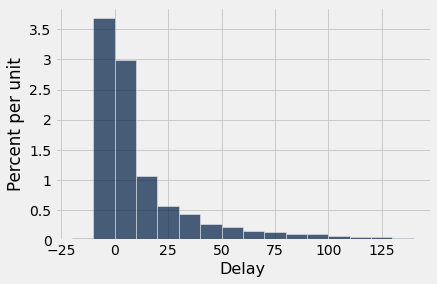

In [7]:
united_bins = np.arange(-20, 150, 10)
united.hist('Delay', bins=united_bins)

In [19]:
#calculate your favorite population parameter
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_median = np.percentile(delays,90)
delay_mean, delay_sd, delay_median

(16.658155515370705, 39.480199851609314, 55.0)

In [20]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [21]:
one_sample_mean(100)

9.63

In [22]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [23]:
sample_means_100 = ten_thousand_sample_means(100)

In [24]:
sample_means_100

array([18.11, 18.06, 11.92, ..., 25.97, 15.79, 13.78])

In [25]:
len(sample_means_100)

10000

Population Average: 16.658155515370705


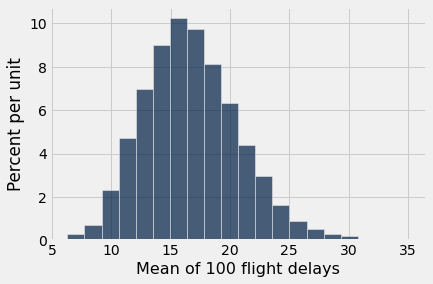

In [26]:
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


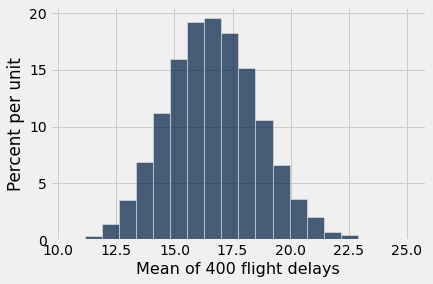

In [27]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

In [28]:
sample_means_900 = ten_thousand_sample_means(900)

## Distribution of the Sample Average

In [29]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

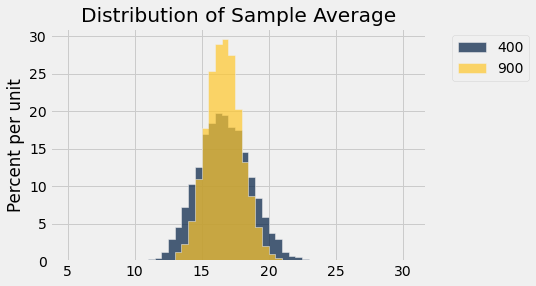

In [30]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

In [ ]:
united.num_rows

In [ ]:
# How many possible sample means are there?
united.num_rows ** 400

In [ ]:
delay_mean = np.mean(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))

In [31]:
"""Empirical distribution of random sample means"""
# modify the code to also compute the 95% confidence interval
def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.658136
Population SD: 39.480199851609314
SD of sample means: 3.969481903914414


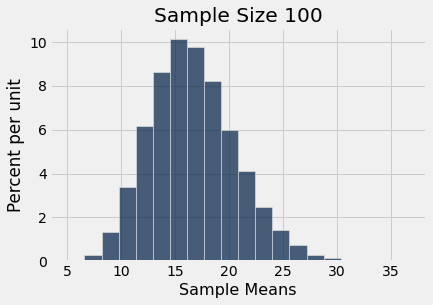

In [32]:
plot_and_summarize_sample_means(100)

In [ ]:
39.48 / 3.932

In [ ]:
plot_and_summarize_sample_means(400)

In [ ]:
39.48 / 1.973

In [ ]:
plot_and_summarize_sample_means(625)

In [ ]:
39.48 / 1.577